In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import cld3
from wordcloud import WordCloud, STOPWORDS 

In [2]:
# Load csv file (titles were modified)
# id;challenge;idea_title;idea_url;assessor;triplet_id;proposal_id;impact_note;impact_rating;feasibility_note;feasibility_rating;auditability_note;auditability_rating;filtered_out;feedback;Excellent;Good;Filtered Out;vCA_Feedback
df = pd.read_csv('f8_reviews_after_flag.csv', sep=';')

In [3]:
df['avg_rating'] = (df.impact_rating + df.feasibility_rating + df.auditability_rating)/3
df['avg_avg_rating'] = df.groupby('proposal_id')['avg_rating'].transform(np.mean)
df.sort_values(by=['avg_avg_rating'], inplace=True, ascending=False)

In [4]:
df['bias'] = df.avg_avg_rating - df.avg_rating

In [5]:
reviews_by_ca = df['assessor'].value_counts()
print('Total CAs:',reviews_by_ca.count())
print('Reviews per CA (mean):', reviews_by_ca.mean())
print('Reviews per CA (median):', reviews_by_ca.median())
print('Max reviews by a CA:', reviews_by_ca.max())
print('Number of reviews by top 10 CAs:',reviews_by_ca.head(10).sum())
print('Number of CAs with only 1 review:', reviews_by_ca[reviews_by_ca==1].count())
print('Total reviews overall:', df['assessor'].count())

Total CAs: 701
Reviews per CA (mean): 15.313837375178316
Reviews per CA (median): 6.0
Max reviews by a CA: 251
Number of reviews by top 10 CAs: 1394
Number of CAs with only 1 review: 99
Total reviews overall: 10735


In [6]:
print('Top CAs by number of reviews')
print(reviews_by_ca.head(20))

Top CAs by number of reviews
z_assessor_727     251
z_assessor_57      199
z_assessor_732     191
z_assessor_1193    164
z_assessor_648     110
z_assessor_20      108
z_assessor_1693    100
z_assessor_719      92
z_assessor_1454     90
z_assessor_536      89
z_assessor_681      86
z_assessor_679      86
z_assessor_1747     85
z_assessor_46       85
z_assessor_1146     83
z_assessor_1652     80
z_assessor_1413     78
z_assessor_649      76
z_assessor_1896     70
z_assessor_710      70
Name: assessor, dtype: int64


<AxesSubplot:>

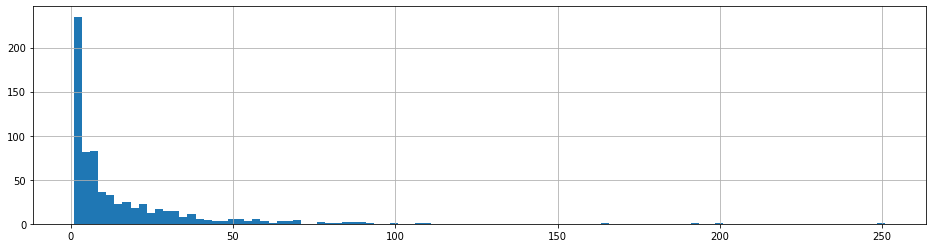

In [7]:
reviews_by_ca.hist(figsize=(16,4),bins=100)

In [8]:
reviews_by_ca[reviews_by_ca==1]

z_assessor_1316    1
z_assessor_720     1
z_assessor_1257    1
z_assessor_833     1
z_assessor_747     1
                  ..
z_assessor_2022    1
z_assessor_485     1
z_assessor_1856    1
z_assessor_347     1
z_assessor_1981    1
Name: assessor, Length: 99, dtype: int64

<AxesSubplot:>

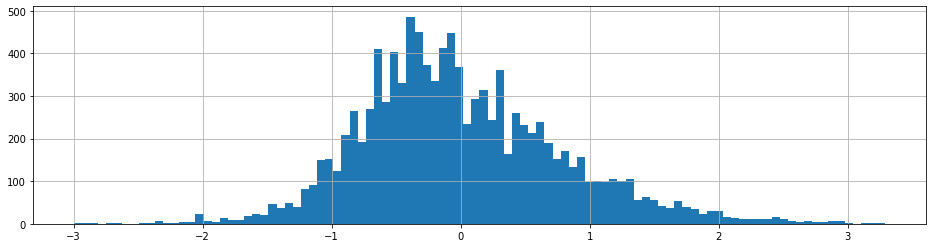

In [9]:
# Assesment bias from average scrore
df['bias'].hist(figsize=(16,4),bins=100)

In [22]:
df[np.logical_or(df['bias']>2.5,df['bias']<-2.5)]['assessor']

5663     z_assessor_1866
8979      z_assessor_701
798       z_assessor_546
10734     z_assessor_999
552      z_assessor_1792
              ...       
4676     z_assessor_1701
3123     z_assessor_1477
5788     z_assessor_1914
3963     z_assessor_1641
9071      z_assessor_710
Name: assessor, Length: 61, dtype: object

In [28]:
a = ""
for ff in df[np.logical_or(df['bias']>2.5,df['bias']<-2.5)].id:
    a = a + ",A2="+str(ff)
print(a)

,A2=5694,A2=9655,A2=7930,A2=11672,A2=5335,A2=8348,A2=11547,A2=5683,A2=9927,A2=9905,A2=900,A2=1005,A2=2675,A2=9906,A2=138,A2=1016,A2=7759,A2=7784,A2=2886,A2=5699,A2=7795,A2=7193,A2=7758,A2=7756,A2=6257,A2=6019,A2=86,A2=5701,A2=7757,A2=9420,A2=139,A2=7773,A2=9972,A2=7772,A2=1895,A2=7760,A2=7767,A2=10851,A2=7763,A2=7771,A2=7766,A2=7765,A2=7774,A2=7762,A2=7764,A2=7770,A2=7801,A2=7761,A2=7752,A2=5729,A2=7751,A2=1004,A2=6413,A2=11271,A2=3624,A2=6012,A2=4457,A2=2553,A2=5876,A2=3599,A2=9761


In [11]:
df[df['assessor']=='z_assessor_1541'][['impact_note','feasibility_note','auditability_note']]


,impact_note,feasibility_note,auditability_note
3383,Yes.,10 years of experience is a lot and they raise...,SDG is not include! the rest is ok for me.


In [377]:
asssessor = 'z_assessor_57'
for rev in df[df['assessor']==asssessor].itertuples():
    print(rev.impact_note)
    print(rev.impact_rating)
    print('')
    print(rev.feasibility_note)
    print(rev.feasibility_rating)
    print('')
    print(rev.auditability_note)
    print(rev.auditability_rating)
    print('--------------')

I found this proposal quite innovative, it promises something very different from anything I have evaluated so far: placing NFTs and other tokens in GPS locations, with the aim of making it easier for people to pick them up, as the author of the proposal explains. This would generate a very valuable Dapp that would add to our Cardano blockchain a new type of use for NFTs, which is not found so far in any other blockchain and also with the establishment of several smart contracts. Perhaps this novelty will attract new users to our blockchain, popularizing it, thus achieving one of the specific objectives of the challenge. Also, this would certainly increase the number of transactions in Cardano, as we are looking for in the current challenge. From what you can understand by reading the proposal, the idea here is for people to pay small amounts in ADA to be in a certain place at a certain time. An observation: what would HOSKY and Nudge be? I would like the author to explain this, becaus

In [441]:
df[df['assessor']==asssessor]


,id,challenge,idea_title,idea_url,assessor,triplet_id,proposal_id,impact_note,impact_rating,feasibility_note,...,auditability_rating,filtered_out,feedback,Excellent,Good,Filtered Out,vCA_Feedback,avg_rating,avg_avg_rating,bias
7590,7970,F8: DApps and Integrations,Cardano Beam - GPS based Assets,https://app.ideascale.com/t/UM5UZBuou,z_assessor_57,57-396850,396850,"I found this proposal quite innovative, it pro...",5,The author starts this session by talking abou...,...,5,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,0.000000
7685,8077,F8: DApps and Integrations,DirectEd - Donations dApp,https://app.ideascale.com/t/UM5UZBvfr,z_assessor_57,57-400019,400019,The proposal is perfect in terms of impact. Th...,5,"The script is very good, we know what would ha...",...,4,NaN,This assessment goes into great detail on how ...,NaN,NaN,NaN,NaN,4.666667,4.805556,0.138889
7725,8121,F8: New Member Onboarding,Content & Insights: Multi-Channel,https://app.ideascale.com/t/UM5UZBwAQ,z_assessor_57,57-401884,401884,This proposal is certainly in line with the ob...,5,"The proposal's script is not conventional, but...",...,5,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.685185,-0.314815
7639,8022,F8: Self-Sovereign Identity,cAuth (SSI & oAuth) by AIM,https://app.ideascale.com/t/UM5UZBvEM,z_assessor_57,57-398403,398403,The proponents explain the problem situation v...,5,The way the script was presented to us is exce...,...,4,NaN,NaN,NaN,NaN,NaN,NaN,4.666667,4.666667,0.000000
7718,8113,"F8: Grow Africa, Grow Cardano",The Africa Catalyst School,https://app.ideascale.com/t/UM5UZBvxf,z_assessor_57,57-401105,401105,This proposal is positive for the African cont...,5,The proposal script is perfect. We know what w...,...,4,NaN,NaN,NaN,NaN,NaN,NaN,4.666667,4.659864,-0.006803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7626,8008,"F8: Grow India, Grow Cardano",Credwise,https://app.ideascale.com/t/UM5UZBu80,z_assessor_57,57-398076,398076,"Unfortunately, this proposal does not fit the ...",2,That part of the proposal was presented very i...,...,1,NaN,NaN,NaN,NaN,NaN,NaN,1.333333,1.904762,0.571429
7736,8132,F8: DApps and Integrations,One Vote,https://app.ideascale.com/t/UM5UZBwQ3,z_assessor_57,57-402898,402898,"Unfortunately, the impression I got when readi...",1,The script of the proposal is extremely superf...,...,2,NaN,NaN,NaN,NaN,NaN,NaN,1.333333,1.904762,0.571429
7606,7987,F8: Miscellaneous Challenge,Nifty Charities,https://app.ideascale.com/t/UM5UZBu0L,z_assessor_57,57-397548,397548,All content about the proposal is on the attac...,1,"There is no roadmap attached to this proposal,...",...,1,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.777778,0.777778
7614,7995,F8: DApps and Integrations,Drive Secure Community Chat Servers,https://app.ideascale.com/t/UM5UZBu1e,z_assessor_57,57-397627,397627,Unfortunately the proposal is poorly explained...,1,The proponent does not provide any roadmap to ...,...,1,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.555556,0.555556


In [369]:
challenges = df['challenge'].value_counts()
print(challenges)

F8: DApps and Integrations                 927
F8: Grow Africa, Grow Cardano              898
F8: Scale-UP Cardano's Community Hubs      756
F8: Business Solutions (B2B & B2C)         688
F8: Open Source Development Ecosystem      658
F8: Gamers On - Chained                    615
F8: Grow India, Grow Cardano               614
F8: Miscellaneous Challenge                611
F8: Grow East Asia, Grow Cardano           569
F8: New Member Onboarding                  553
F8: Developer Ecosystem                    518
F8: Cross-Chain Collaboration              513
F8: Fund9 challenge setting                503
F8: Nation Building Dapps                  490
F8: Film + Media (FAM) creatives unite!    358
F8: Accelerate Decentralized Identity      251
F8: Self-Sovereign Identity                187
F8: The Great Migration (from Ethereum)    182
F8: Community Advisor Improvements         179
F8: Cardano scaling solutions              175
F8: Open Standards & Interoperability      171
F8: Lobbying 

In [374]:
for chall in challenges.index.tolist():
    print('****** '+chall+' ******')
#    print(df[df['challenge']==chall].groupby(['idea_title'],sort=False)['avg_avg_rating'].mean().itertuple())
    for prop in df[df['challenge']==chall].groupby(['idea_title'],sort=False)['avg_avg_rating'].mean().iteritems():
        print('{}{}'.format(prop[0].ljust(50), '{:.2f}'.format(prop[1])))
    print(' ')

****** F8: DApps and Integrations ******
Cardano Beam - GPS based Assets                   5.00
cBilling - Cardano Billing DApp                   4.96
Control your data w Profila part 2                4.92
DirectEd - Donations dApp                         4.81
Anonymity/data control ZKT (part 2)               4.80
Done Collectively Discord Integrati               4.80
Oracle Developer Portal                           4.79
Littlefish - Coordinating Action                  4.70
Artificial Intelligence/ML API DApp               4.69
Proposer-tool on chain - AIM                      4.67
ADA-DESO Templates to Test dApps                  4.61
How often can a brand contact you?                4.60
Neuro tools for teams & growth                    4.60
Crowdfunding with inbuilt mediation               4.56
PeakChain Carsharing Platform                     4.53
C64 Extension Wallet                              4.53
Company privacy ledger (GDPR, CCPA)               4.53
PubWeave: An academic ec

In [151]:
print(df[df['challenge']=='Fund9 challenge setting'].groupby(['idea_title'])['avg_avg_rating'].mean())

Series([], Name: avg_avg_rating, dtype: float64)


In [242]:
len(re.findall(r'\w+', df.impact_note.iloc[34])) 

153

<AxesSubplot:>

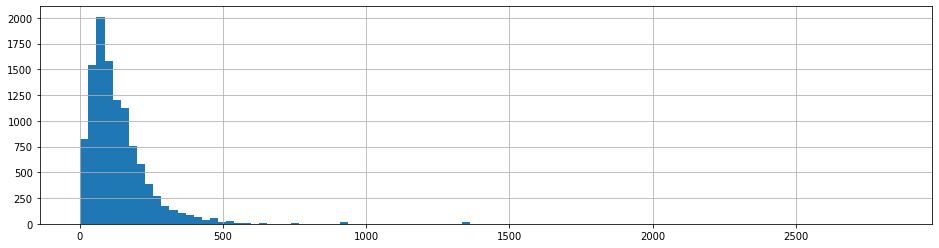

In [245]:
df['impact_note'].str.split().str.len().hist(figsize=(16,4),bins=100)

<AxesSubplot:>

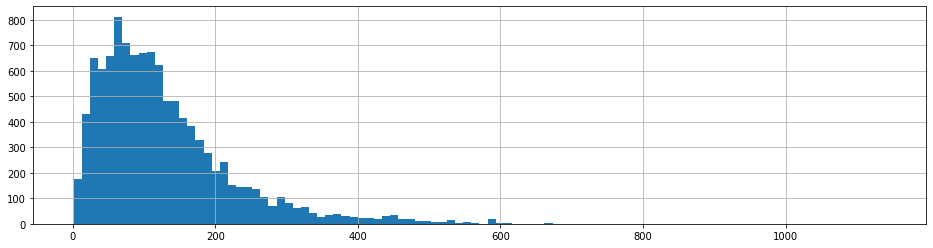

In [246]:
df['feasibility_note'].str.split().str.len().hist(figsize=(16,4),bins=100)

<AxesSubplot:>

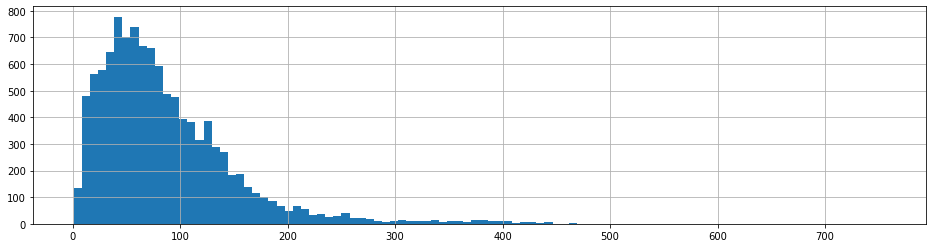

In [247]:
df['auditability_note'].str.split().str.len().hist(figsize=(16,4),bins=100)

In [404]:
word_count_limit = 20
low_word_reviews = df[np.logical_or(np.logical_or(df['impact_note'].str.split().str.len()<word_count_limit, df['feasibility_note'].str.split().str.len()<word_count_limit),df['auditability_note'].str.split().str.len()<word_count_limit)]

In [405]:
low_word_reviews.count()[0]

1025

In [390]:
print(low_word_reviews.sort_values(by=['id'], inplace=False, ascending=True).id.to_string(index=False))

   19
   20
   22
   23
   25
   26
   27
   28
   29
   31
   32
   33
   34
   35
   36
   37
   38
   39
   40
   41
   42
   43
   44
   45
   47
   48
   50
   51
   53
   55
   56
   57
   58
   59
   60
   61
   62
   63
   64
   70
   71
   74
   76
   78
   79
   82
   83
   84
   85
   86
   87
   88
   91
   93
   94
   96
   97
  101
  102
  103
  104
  106
  107
  108
  110
  111
  112
  113
  115
  116
  117
  118
  119
  121
  122
  123
  125
  126
  127
  128
  129
  131
  132
  136
  162
  164
  165
  167
  170
  171
  172
  173
  191
  234
  235
  236
  237
  238
  239
  240
  241
  246
  257
  258
  259
  261
  276
  283
  284
  286
  295
  322
  350
  383
  529
  550
  551
  552
  553
  554
  569
  577
  579
  580
  581
  582
  583
  585
  587
  588
  591
  627
  628
  631
  933
  934
  935
  936
  937
  938
  939
  940
  941
  943
  946
  947
  948
  950
  952
  953
  954
  955
  957
  958
  960
  961
  963
  964
 1119
 1131
 1137
 1146
 1150
 1207
 1213
 1214
 121

In [406]:
a = ""
for ff in low_word_reviews.sort_values(by=['id'], inplace=False, ascending=True).id:
    a = a + ",A2="+str(ff)
print(a)

,A2=19,A2=20,A2=22,A2=23,A2=25,A2=26,A2=27,A2=28,A2=29,A2=31,A2=32,A2=33,A2=34,A2=35,A2=36,A2=37,A2=38,A2=39,A2=40,A2=41,A2=42,A2=43,A2=44,A2=45,A2=47,A2=48,A2=50,A2=51,A2=53,A2=55,A2=56,A2=57,A2=58,A2=59,A2=60,A2=61,A2=62,A2=63,A2=64,A2=70,A2=71,A2=74,A2=76,A2=78,A2=79,A2=82,A2=83,A2=84,A2=85,A2=86,A2=87,A2=88,A2=91,A2=93,A2=94,A2=96,A2=97,A2=101,A2=102,A2=103,A2=104,A2=106,A2=107,A2=108,A2=110,A2=111,A2=112,A2=113,A2=115,A2=116,A2=117,A2=118,A2=119,A2=121,A2=122,A2=123,A2=125,A2=126,A2=127,A2=128,A2=129,A2=131,A2=132,A2=136,A2=162,A2=164,A2=165,A2=167,A2=170,A2=171,A2=172,A2=173,A2=191,A2=234,A2=235,A2=236,A2=237,A2=238,A2=239,A2=240,A2=241,A2=246,A2=257,A2=258,A2=259,A2=261,A2=276,A2=283,A2=284,A2=286,A2=295,A2=322,A2=350,A2=383,A2=529,A2=550,A2=551,A2=552,A2=553,A2=554,A2=569,A2=577,A2=579,A2=580,A2=581,A2=582,A2=583,A2=585,A2=587,A2=588,A2=591,A2=627,A2=628,A2=631,A2=933,A2=934,A2=935,A2=936,A2=937,A2=938,A2=939,A2=940,A2=941,A2=943,A2=946,A2=947,A2=948,A2=950,A2=952,A2=953,A2=954

In [278]:
df['impact_note'].iloc[4]

'Managing certifications with DIDs is a key entry point for utilization for non-native blockchain users. PeopleCert has the domain experience to drive maximum impact from day 1 with their history in certification assessment & management. I would be interested to see how they plan for repeat usage and value from these certifications beyond the acquisition and occasional verification by an employer.'

In [320]:
lang = []
for index, review in df.iterrows():
    lang.append(cld3.get_language(review.impact_note).language)
    #lang.append(langid.classify(review.impact_note)[0])
df['lang'] = lang

In [321]:
df['lang'].value_counts()


en    11014
fr        5
vi        1
de        1
es        1
Name: lang, dtype: int64

In [357]:
df[df['lang']=='fr']

,id,challenge,idea_title,idea_url,assessor,triplet_id,proposal_id,impact_note,impact_rating,feasibility_note,feasibility_rating,auditability_note,auditability_rating,blank,filtered_out,feedback,avg_rating,avg_avg_rating,bias,lang
913,995,"F8: Grow Africa, Grow Cardano",Catalyst Africa Town Hall (CATH),https://app.ideascale.com/t/UM5UZBv7d,z_assessor_1235,1235-401713,401713,"J'ai mis un 5 car le projet est peritinent, le...",5,"Ce projet est déjà mis en place et progresse, ...",5,Les informations fournies sont assez claires p...,5,NaN,NaN,NaN,5.000000,4.659864,-0.340136,fr
911,993,"F8: Grow Africa, Grow Cardano",Inc. Train the Trainer Africa MVP,https://app.ideascale.com/t/UM5UZBvxD,z_assessor_1235,1235-401078,401078,"L'Afrique a un fort potentiel humain, mais res...",5,J'ai mis un 4 à la faisabilité du projet car c...,4,Les informations fournies peuvent permettre à ...,4,NaN,NaN,NaN,4.333333,4.641026,0.307692,fr
912,994,"F8: Grow Africa, Grow Cardano",The Africa Catalyst School,https://app.ideascale.com/t/UM5UZBvxf,z_assessor_1235,1235-401105,401105,Ce projet de créer une école africaine sur la ...,5,Ce projet peut être mis rapidement en place vu...,5,Ce projet ne peut pas échouer si le plan est s...,5,NaN,NaN,NaN,5.000000,4.640523,-0.359477,fr
910,992,"F8: Grow Africa, Grow Cardano",Mentoring Africa to Success,https://app.ideascale.com/t/UM5UZBvgh,z_assessor_1235,1235-400070,400070,"Très bon projet, j'ai mis un 5 pour son financ...",5,Ce projet a déja débuté et donc doit se poursu...,5,"Les informations necessaires, objectifs long t...",5,NaN,NaN,NaN,5.000000,4.611111,-0.388889,fr
909,991,"F8: Grow Africa, Grow Cardano",Tokenized Security Exchange,https://app.ideascale.com/t/UM5UZBulf,z_assessor_1235,1235-396652,396652,J'ai mis un 2 car ce projet n'a pas pris en co...,2,ce projet dois être revu et réfléchit à nouvea...,2,La formulation des objectifs est claire et mes...,3,NaN,NaN,NaN,2.333333,4.210526,1.877193,fr


In [325]:
assesors_means = df.groupby(['assessor'],sort=False)['avg_rating'].mean()

In [352]:
print('Lovers:',assesors_means[assesors_means==5].count(), '(all 5 5 5)')

Lovers: 62 (all 5 5 5)


In [351]:
print('Haters:',assesors_means[assesors_means==1].count(), '(all 1 1 1)')

Haters: 2 (all 1 1 1)


In [340]:
df[df['assessor']=='z_assessor_1694'].count()

id                     9
challenge              9
idea_title             9
idea_url               9
assessor               9
triplet_id             9
proposal_id            9
impact_note            9
impact_rating          9
feasibility_note       9
feasibility_rating     9
auditability_note      9
auditability_rating    9
blank                  0
filtered_out           0
feedback               0
avg_rating             9
avg_avg_rating         9
bias                   9
lang                   9
dtype: int64

In [442]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(df['feedback'].str.cat(sep=" "))

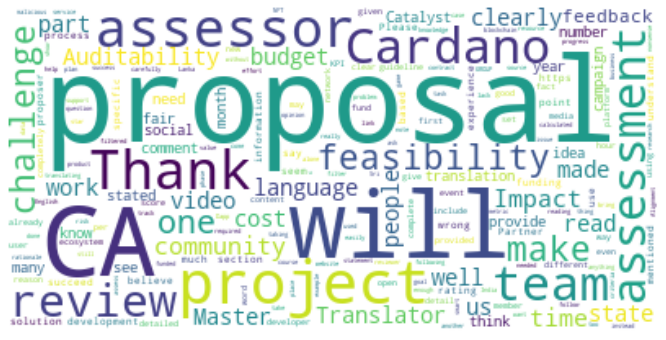

In [449]:
plt.figure( figsize=(15,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [429]:
df[df['assessor']=='z_assessor_541']['impact_note'].str.cat(sep=" ")

'I consider the proposal is aligned with the objectives of the proposal.  It is consistent with the current state of the donation management system in many developing countries, lacking transparency and with many empty spaces for corruption and loss of faith on the part of donors.  Every fraud in the donation distribution system is one less donor and therefore, one more young person without access to education.     Zug is the Silicon Valley of blockchain technology, if there is a place to socialize one of the best tricks in the Cardano hat is there.  The proponent\'s pre-established contacts together with some extra help from the Cardano Foundation with its offices in Zug, could achieve something interesting.   It\'s a commendable fight. It’s clear the alignment of the proposal with the objectives of the challenge “Nation Building Dapps”. According to the information provided, the proponents are a European university institution recognized for their educational mission to provide unive